In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
# import skimage
img = cv2.imread("pic.jpg")
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

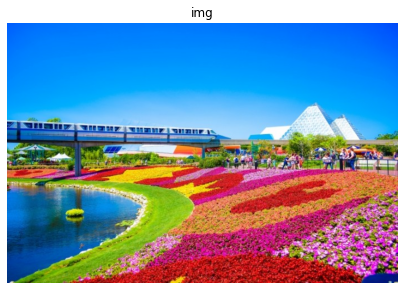

In [128]:
draw_picture(img, "img")

In [129]:
bl, gr, rd = cv2.split(img)

In [165]:
# складываем в одномерный массв троек
i_r = img.reshape((700*466, 3))

In [168]:
# восстанавливаем в рисунок
i_r_r = i_r.reshape((466,700, 3))

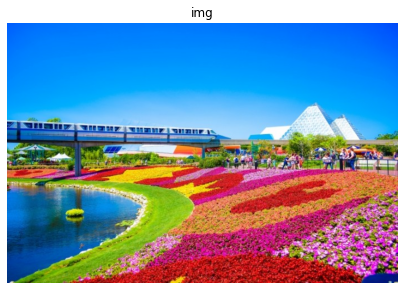

In [169]:
draw_picture(i_r_r, "img")

In [130]:
len(img[0])

700

In [175]:
# Исходное число цветов = 81
df = pd.DataFrame(i_r,dtype=np.short)
df.drop_duplicates(inplace = True, ignore_index=True)
df

,0,1,2
0,255,92,0
1,253,93,0
2,254,94,0
3,255,96,0
4,253,96,0
...,...,...,...
164126,159,203,196
164127,166,207,200
164128,172,213,205
164129,175,213,201


In [132]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [173]:
from sklearn.preprocessing import StandardScaler
# st_img = StandardScaler().fit_transform(img[0])
db = DBSCAN(eps=100, min_samples=100).fit(i_r)
# число кластеров
df_dbscan = pd.DataFrame(i_r[db.core_sample_indices_])
print(len(df_dbscan.drop_duplicates()))
# число "шумовых"
print(len(db.labels_[np.where(db.labels_ == -1)]))

MemoryError: 

In [174]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=10)
clustering.fit(i_r)

MemoryError: Unable to allocate 396. GiB for an array with shape (53203056900,) and data type float64

In [135]:
setup = [
{
    'alg':'KMeans',    'n_clusters':2,},
{
    'alg':'KMeans',    'n_clusters':5,},
{
    'alg':'KMeans',    'n_clusters':10,},
{
    'alg':'KMeans',    'n_clusters':20,},
{
    'alg':'DBSCAN',    'eps':10,   'min_samples':100},
{
    'alg':'AgglomerativeClustering',    'n_clusters':2,},
{
    'alg':'AgglomerativeClustering',    'n_clusters':5,},
{
    'alg':'AgglomerativeClustering',    'n_clusters':10,},
{
    'alg':'AgglomerativeClustering',    'n_clusters':20,},
]

In [136]:
def run(stp,data):
    res = stp
    for i,d in enumerate(stp):
        if d['alg']=='KMeans':
            kmeans = KMeans(n_clusters=d['n_clusters'], random_state=0).fit(data)
            res[i]['num_clusters'] = len(kmeans.cluster_centers_)
        if d['alg']=='DBSCAN':
            db = DBSCAN(eps=d['eps'], min_samples=d['min_samples']).fit(data)
            df_dbscan = pd.DataFrame(data[db.core_sample_indices_])
            # число кластеров
            # print(len(df_dbscan.drop_duplicates()))
            # число "шумовых"
            # print(len(db.labels_[np.where(db.labels_ == -1)]))
            res[i]['num_clusters'] = len(df_dbscan.drop_duplicates())
        if d['alg']=='AgglomerativeClustering':
            agl = AgglomerativeClustering(linkage="ward", n_clusters=d['n_clusters']).fit(data)
            res[i]['num_clusters'] = agl.n_clusters_
        
    return res


In [137]:
run(setup,img[0])

[{'alg': 'KMeans', 'n_clusters': 2, 'num_clusters': 2},
 {'alg': 'KMeans', 'n_clusters': 5, 'num_clusters': 5},
 {'alg': 'KMeans', 'n_clusters': 10, 'num_clusters': 10},
 {'alg': 'KMeans', 'n_clusters': 20, 'num_clusters': 20},
 {'alg': 'DBSCAN', 'eps': 10, 'min_samples': 100, 'num_clusters': 60},
 {'alg': 'AgglomerativeClustering', 'n_clusters': 2, 'num_clusters': 2},
 {'alg': 'AgglomerativeClustering', 'n_clusters': 5, 'num_clusters': 5},
 {'alg': 'AgglomerativeClustering', 'n_clusters': 10, 'num_clusters': 10},
 {'alg': 'AgglomerativeClustering', 'n_clusters': 20, 'num_clusters': 20}]

In [138]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(img[0])
len(kmeans.cluster_centers_)

2

In [139]:
kmeans.cluster_centers_[0]

array([253.80392157, 114.41372549,   0.33333333])

In [140]:
# kmeans.labels_
df = pd.DataFrame(img[0])
a = img[0]
# for cntr in kmeans.cluster_centers_:
a0 = kmeans.cluster_centers_[1]
cntr_idx = np.sum(np.square(np.abs(a-a0)),1).argmin()
cntr_color = a[cntr_idx]
cntr_color
    # df.loc[kmeans.labels_==1, :] = cntr_color

array([253,  93,   0], dtype=uint8)

In [141]:
img[0]

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [246,  73,   0],
       [246,  73,   0],
       [245,  72,   0]], dtype=uint8)

In [142]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(img[0])
len(kmeans.cluster_centers_)

5

In [147]:
df = pd.DataFrame(img[0])
a = img[0]
print(kmeans.cluster_centers_)
for cntr in kmeans.cluster_centers_:
    # a0 = cntr
    cntr_idx = np.sum(np.square(np.abs(a-cntr)),1).argmin()
    cntr_color = a[cntr_idx]
    print('cntr = %s' % (str(cntr)))
    print('cntr_idx = %s' % (str(cntr_idx)))
    print('color = %s' % (str(cntr_color)))
    df.loc[kmeans.labels_== cntr_idx, :] = cntr_color
    print(len(df.loc[kmeans.labels_== cntr_idx, :]))


[[2.54084548e+02 1.17151603e+02 3.58600583e-01]
 [2.53230769e+02 8.98461538e+01 1.69230769e-01]
 [2.53826446e+02 1.01140496e+02 1.40495868e-01]
 [2.53171429e+02 1.09635714e+02 2.92857143e-01]
 [2.49225806e+02 7.70967742e+01 1.11022302e-16]]
cntr = [254.0845481  117.1516035    0.35860058]
cntr_idx = 118
color = [254 117   1]
0
cntr = [2.53230769e+02 8.98461538e+01 1.69230769e-01]
cntr_idx = 642
color = [253  89   0]
0
cntr = [2.53826446e+02 1.01140496e+02 1.40495868e-01]
cntr_idx = 31
color = [253 101   0]
0
cntr = [253.17142857 109.63571429   0.29285714]
cntr_idx = 464
color = [253 110   1]
0
cntr = [2.49225806e+02 7.70967742e+01 1.11022302e-16]
cntr_idx = 681
color = [249  78   0]
0


In [152]:
img

array([[[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [245,  72,   0]],

       [[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       [[254,  94,   0],
        [253,  93,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       ...,

       [[133,  50,   0],
        [134,  51,   0],
        [132,  48,   0],
        ...,
        [108,  64,  57],
        [113,  68,  55],
        [111,  65,  48]],

       [[127,  48,   0],
        [127,  48,   0],
        [133,  50,   5],
        ...,
        [148, 161, 153],
        [150, 160, 148],
        [144, 155, 139]],

       [[131,  54,   5],
        [121,  43,   0],
        [122,  38,   0],
        ...,
        [172, 213, 205],
        [175, 213, 201],
        [171, 210, 195]]

In [159]:
y = np.expand_dims(df.to_numpy(), axis=0)
y

array([[[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [245,  72,   0]]], dtype=uint8)

In [160]:
draw_picture(y, "img")

In [158]:
df.drop_duplicates(ignore_index=True)

,0,1,2
0,255,92,0
1,253,93,0
2,254,94,0
3,255,96,0
4,253,96,0
...,...,...,...
76,248,77,0
77,248,76,0
78,247,75,0
79,246,73,0


In [145]:
kmeans.labels_==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,